## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

https://github.com/divyanshufialok99/TITANIC-DATASET-EDA.git

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

td=pd.read_csv('titanic.csv')
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 1) Determine if the survival rate is associated to the class of passenger.

In [8]:
srcpf=pd.crosstab(td['Pclass'], td['Survived'])
srcpf

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


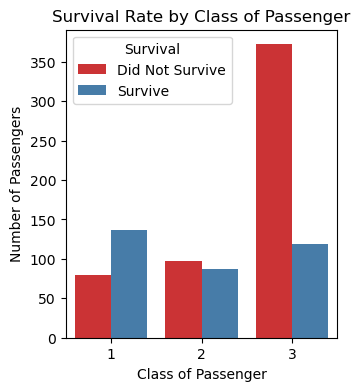

In [28]:
plt.figure(figsize=(3.5, 4))
sns.countplot(data=td, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Rate by Class of Passenger')
plt.xlabel('Class of Passenger')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival', labels=['Did Not Survive', 'Survive'])
plt.show()

In [10]:
overallsurvrate=td['Survived'].sum()/len(td)
print("Overall Survival Rate: ", overallsurvrate)

Overall Survival Rate:  0.3838383838383838


In [11]:
srcpf1=pd.crosstab(td['Pclass'], td['Survived'], normalize='index')
srcpf1

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


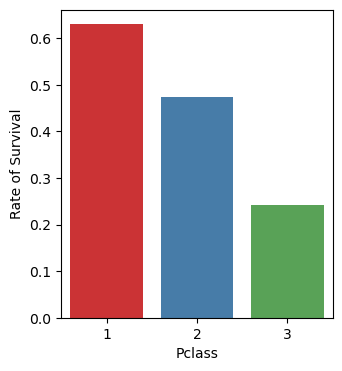

In [29]:
plt.figure(figsize=(3.5,4))
sns.barplot(x=td['Pclass'],y=td['Survived'],errorbar=None, palette='Set1')
plt.ylabel('Rate of Survival')
plt.show()

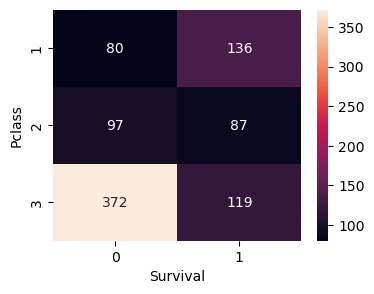

In [13]:
plt.figure(figsize=(4,3))
sns.heatmap(srcpf, annot=True, fmt='d')
plt.xlabel('Survival')
plt.show()

In [14]:
chi2, p, _,_ = chi2_contingency(srcpf)
f"{p:.25f}"

'0.0000000000000000000000455'

Ans. To check the association or correlation between the two categorical variables, we perform chi-square analysis. After performing chi2 analysis, we find that p_value is smaller than 0.05 (p<0.05). Therefore, there is a significant association between survival rate and class of passenger.

#### 2) Determine if the survival rate is associated to the gender.

In [15]:
srgf=pd.crosstab(td['Sex'], td['Survived'])
srgf

Survived,0,1
Sex,,
female,81,233
male,468,109


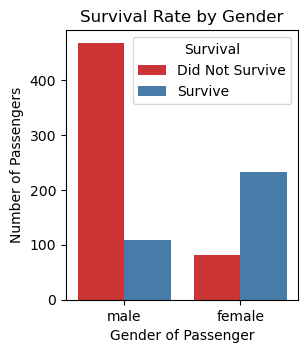

In [27]:
plt.figure(figsize=(3, 3.5))
sns.countplot(data=td, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender of Passenger')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival', labels=['Did Not Survive', 'Survive'])
plt.show()

In [17]:
srgf1=pd.crosstab(td['Sex'], td['Survived'], normalize='index')
srgf1

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


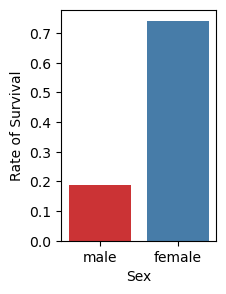

In [30]:
plt.figure(figsize=(2,3))
sns.barplot(x=td['Sex'],y=td['Survived'],errorbar=None, palette='Set1')
plt.ylabel('Rate of Survival')
plt.show()

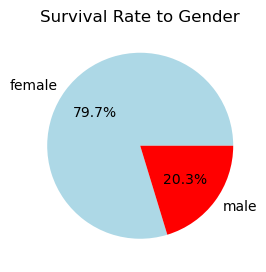

In [34]:
plt.figure(figsize=(3,5))
srg=td.groupby('Sex')['Survived'].mean()
plt.pie(srg, labels=srg.index,autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Survival Rate to Gender')
plt.show()

In [20]:
chi2, p, _, _ = chi2_contingency(srgf)
f"{p:.60f}"

'0.000000000000000000000000000000000000000000000000000000000120'

Ans. To check the association or correlation between the two categorical variables, we perform chi-square analysis. After performing chi2 analysis, we find that p_value is smaller than 0.05 (p<0.05). Therefore, there is a significant association between gender and survival rate.

#### 3) Determine the survival rate is associated to the age.

In [21]:
td['AgeGroup'] = pd.cut(td['Age'], bins=[0,18,60,100], labels=['Children', 'Adults', 'Seniors'])
sraf=pd.crosstab(td['AgeGroup'], td['Survived'])
sraf

Survived,0,1
AgeGroup,,
Children,69,70
Adults,338,215
Seniors,17,5


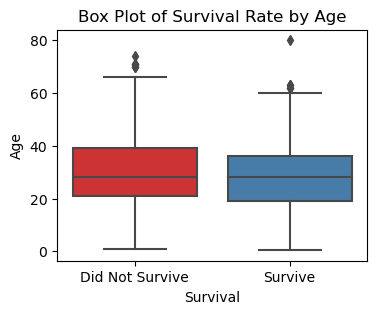

In [22]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='Survived', y='Age', data=td, palette='Set1')
plt.xlabel('Survival')
plt.xticks([0,1],['Did Not Survive','Survive'])
plt.ylabel('Age')
plt.title('Box Plot of Survival Rate by Age')
plt.show()

<Figure size 800x600 with 0 Axes>

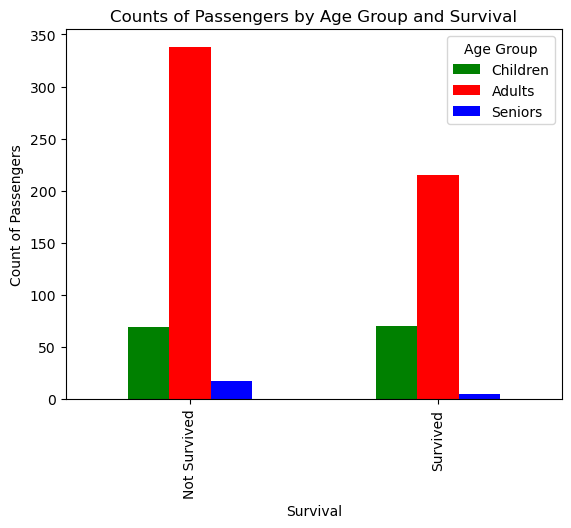

In [23]:
agegroupsurvival = pd.crosstab(td['AgeGroup'], td['Survived'])
agegroupsurvival.columns = ['Not Survived', 'Survived']
agegroupsurvival = agegroupsurvival.T
plt.figure(figsize=(8, 6))
agegroupsurvival.plot(kind='bar',color= ['green', 'red', 'blue'])
plt.title('Counts of Passengers by Age Group and Survival')
plt.xlabel('Survival')
plt.ylabel('Count of Passengers')
plt.legend(title='Age Group')
plt.show()

In [24]:
td['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
chi2, p, _, _ = chi2_contingency(sraf)
p

0.0106620642852553

Ans. To check the association or correlation between the two categorical variables, we perform chi-square analysis. After performing chi2 analysis, we find that p_value is smaller than 0.05 (p<0.05). Therefore, there is a significant association between age and survival rate.